            Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   2.842882e-17  6.574164e-17  1.705729e-16  3.038330e-16  1.350369e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
25%   -5.465676e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
50%   -3.027332e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
75%    1.866028e-01 -1.862987e-01  6.831212e-01 -9.824189e-02 -6.276658e-02   
max    1.618884e+01  1.422486e+01  2.135821e+00  1.344898e+01  2.042732e+01   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3.999000e+03  3.999000e+03        3999.000000     3.999000e+03   
mean  -2.842882e-17 -7.817925e-17           0.000000     1.776801e-17   
std    1.000125e+00  1.000125e+00           1.000125     1.000125e+00

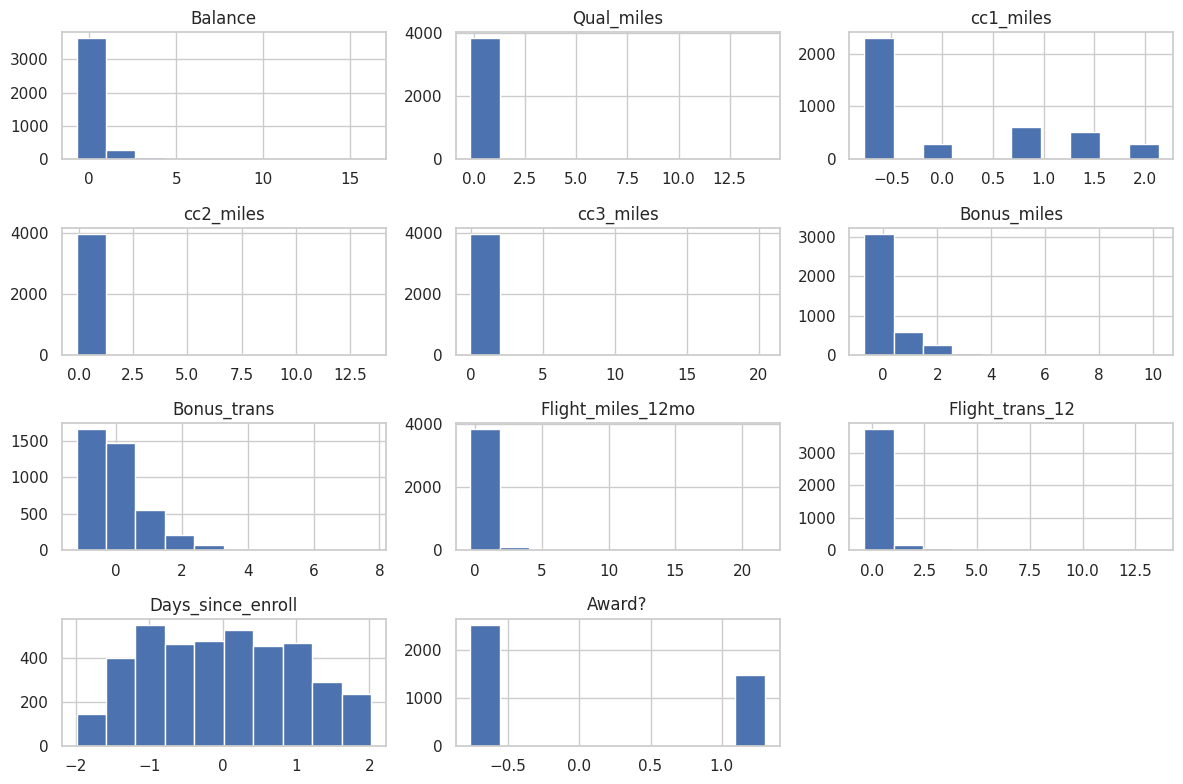

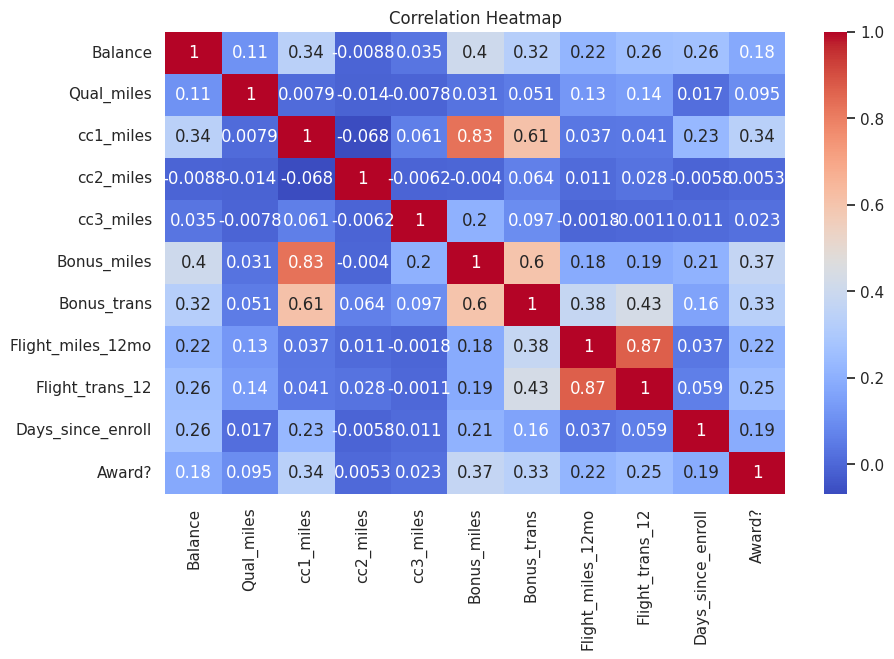

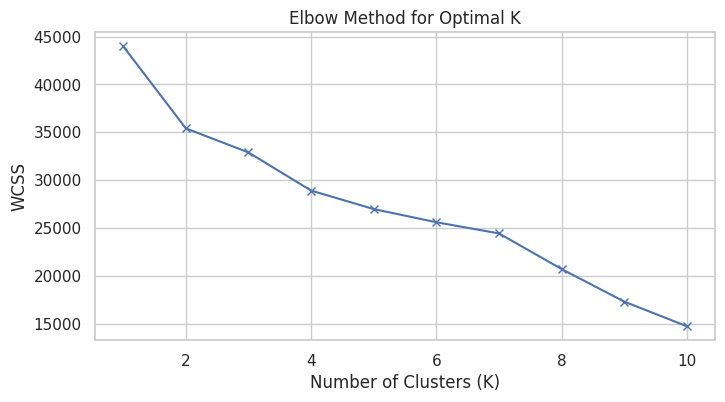

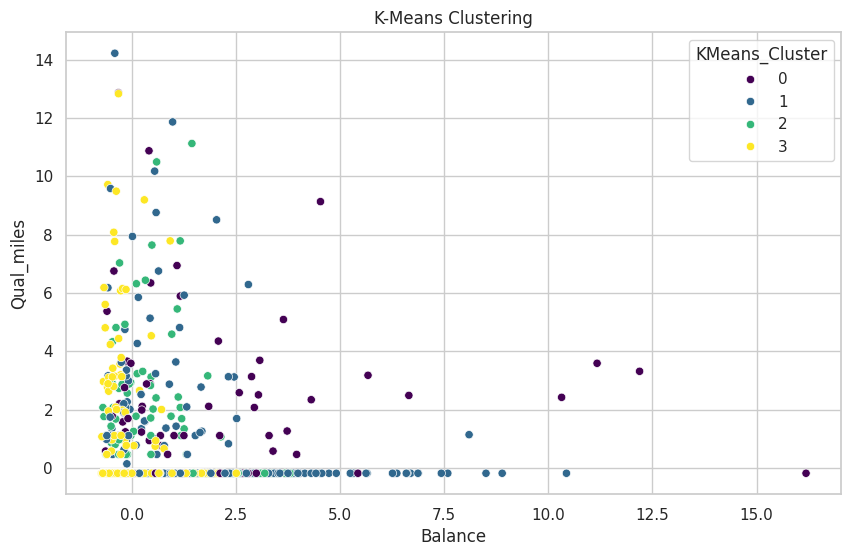

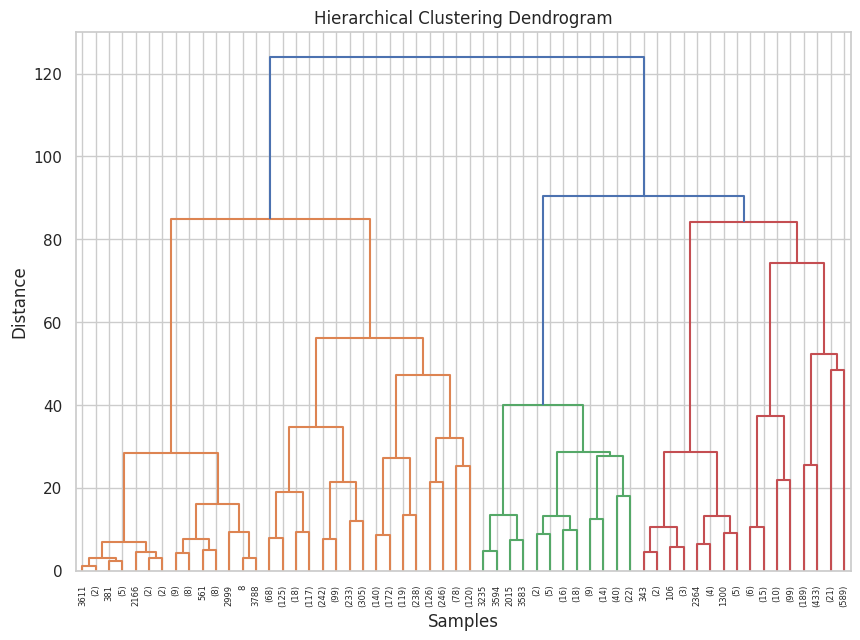

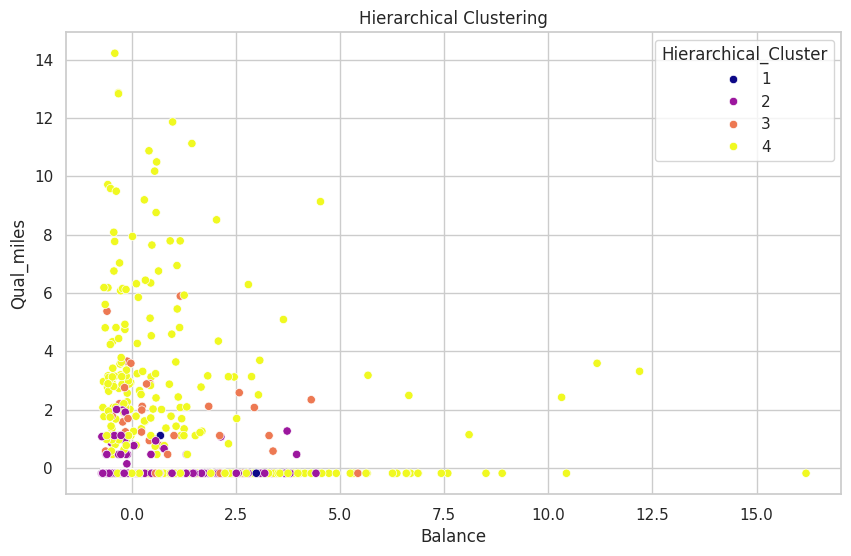

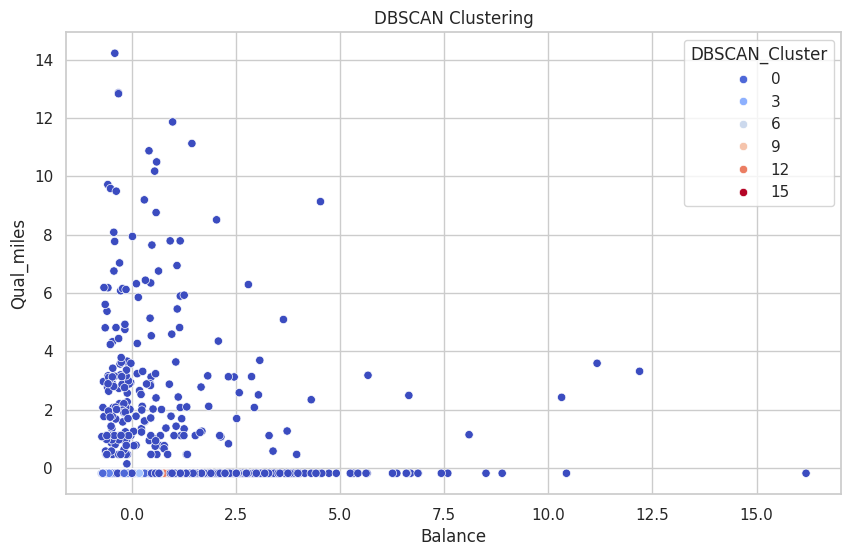

Silhouette Score for KMeans: 0.19071186813310886
Silhouette Score for Hierarchical: 0.30814152852022786
Silhouette Score for DBSCAN: -0.07834757831741163


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Load the dataset
file_path = '/content/EastWestAirlines.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='data')

# Dropping the ID column
df.drop('ID#', axis=1, inplace=True)

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Exploratory Data Analysis (EDA)
# Checking basic statistics of the scaled dataset
print(df_scaled.describe())

# Visualizing the distributions (optional)
df_scaled.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Visualizing correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Implementing K-Means Clustering
# Elbow Method to find the optimal number of clusters
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choosing K=4 for this example and fitting KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# KMeans Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue='KMeans_Cluster', palette='viridis')
plt.title("K-Means Clustering")
plt.show()

# Implementing Hierarchical Clustering
# Linkage using Ward method
Z = linkage(df_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cutting the dendrogram to form clusters (e.g., 4 clusters)
df['Hierarchical_Cluster'] = fcluster(Z, 4, criterion='maxclust')

# Hierarchical Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue='Hierarchical_Cluster', palette='plasma')
plt.title("Hierarchical Clustering")
plt.show()

# Implementing DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# DBSCAN Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue='DBSCAN_Cluster', palette='coolwarm')
plt.title("DBSCAN Clustering")
plt.show()

# Evaluation using Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, df['KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(df_scaled, df['Hierarchical_Cluster'])
dbscan_silhouette = silhouette_score(df_scaled, df['DBSCAN_Cluster'])

print(f"Silhouette Score for KMeans: {kmeans_silhouette}")
print(f"Silhouette Score for Hierarchical: {hierarchical_silhouette}")
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")
